In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -P datasets
!tar xf datasets/cifar-10-python.tar.gz -C datasets

--2021-04-09 18:34:36--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘datasets/cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M   267KB/s    in 5m 15s  

2021-04-09 18:39:52 (529 KB/s) - ‘datasets/cifar-10-python.tar.gz’ saved [170498071/170498071]



In [5]:
with open(file='datasets/cifar-10-batches-py/data_batch_1', mode='rb') as input_file:
    X = pickle.load(input_file, encoding='latin1')

In [21]:
print('Type of X: ')
print(type(X))

print('All keys: ')
print(X.keys())

print('\n')
print('Batch label: ')
print(X['batch_label'])

print('\n')
print('All labels: ')
print(set(X['labels']))

print('\n')
print('Number of pictures: ')
print(len(X['filenames']))

print('\n')
print('Data Shape')
print('batch_size, height*width*channel')
print(X['data'].shape)

# 10.000 images
# 1-D tensor represent an image (width * height * channels) | 32 x 32 x 3 = 3072

Type of X: 
<class 'dict'>
All keys: 
dict_keys(['batch_label', 'labels', 'data', 'filenames'])


Batch label: 
training batch 1 of 5


All labels: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Number of pictures: 
10000


Data Shape
batch_size, height*width*channel
(10000, 3072)


In [23]:
batch_images_one = X['data']

In [24]:
batch_images_one.shape

(10000, 3072)

In [33]:
batch_images_one_reshape1 = batch_images_one.reshape((-1, 3, 32, 32))

print('10000 images, 3 channels, 32 px height, 32 px width')
print(batch_images_one_reshape1.shape)

10000 images, 3 channels, 32 px height, 32 px width
(10000, 3, 32, 32)


In [34]:
batch_images_one_reshape2 = batch_images_one.reshape((-1, 32, 32, 3))

print('10000 images, 32 px height, 32px width, 3 channels')
print(batch_images_one_reshape2.shape)

10000 images, 32 px height, 32px width, 3 channels
(10000, 32, 32, 3)


In [36]:
# Transpose 
batch_images_one_reshape2 = batch_images_one_reshape1.transpose(0, 2, 3, 1)

# (batch_size, channels, height, width)
# (0, 1, 2, 3)
# transpose
# (batch_size, height, width, channels)
# (0, 2, 3, 1)

print('10000 images, 32px height, 32px width, 3 channels')
print(batch_images_one_reshape2.shape)

10000 images, 32px height, 32px width, 3 channels
(10000, 32, 32, 3)


In [37]:
print('Original batch file')
origin_batch = batch_images_one_reshape2.reshape(-1, 3 * 32 * 32)

print('10000 images, 1-D tensor represent image')
print(origin_batch.shape)

Original batch file
10000 images, 1-D tensor represent image
(10000, 3072)


Origin 1-D tensor image 6
(3072,)

Image 6 reshape to height, width, channels
(32, 32, 3)


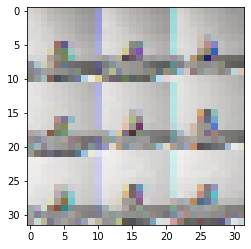

In [42]:
image_6 = batch_images_one[100]
print('Origin 1-D tensor image 6')
print(image_6.shape)

image_6 = image_6.reshape(32, 32, 3)

print('\nImage 6 reshape to height, width, channels')
print(image_6.shape)

plt.imshow(image_6)
plt.show()

# Load images in batch file

In [45]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [46]:
X = unpickle('datasets/cifar-10-batches-py/data_batch_1')
X.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [47]:
X = X['data']

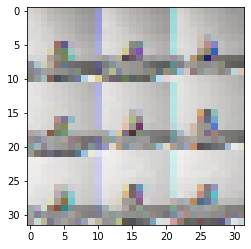

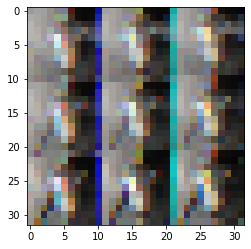

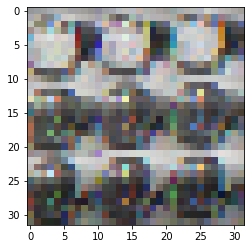

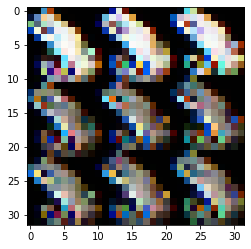

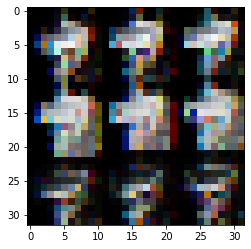

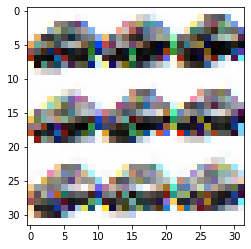

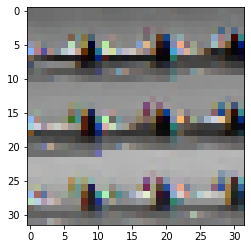

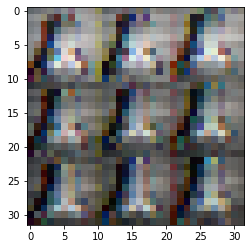

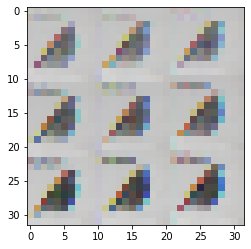

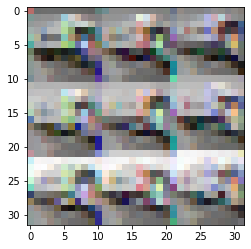

In [50]:
for i in range(100, 110):
    img = X[i].reshape(32, 32, 3) 
    plt.imshow(img)
    plt.show()

# Standardize images

In [51]:
X.mean(axis=0)

array([132.0083, 131.3316, 132.1932, ..., 114.1157, 114.3221, 115.1057])

In [52]:
X = X - X.mean(axis=0)


In [53]:
X = X / np.std(X, axis=0)

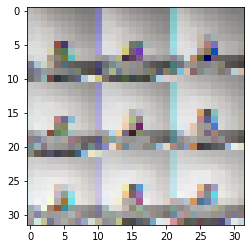

In [61]:
# Standarize image
def show_image(img):
    img_shape = (32, 32, 3)
    img = img.reshape(img_shape)
    
    min_val, max_val = img.min(), img.max()
    
    plt.imshow((img - min_val) / (max_val - min_val))
    plt.show()
    
show_image(X[100])

# ZCA Whitening to Decorrelate features

In [63]:
first_1000_images = X[:1000]

first_1000_images.shape

(1000, 3072)

Whitening is the transformation of data in such a way that its covariance matrix is the identity matrix - the effect of whitening is to decorrelate features

**Step1**: Calculate the covariance matrix

In [68]:
# The covariance between every pair of images
cov_matrix = np.cov(first_1000_images, rowvar=True)
print(cov_matrix.shape)
print(cov_matrix[0:3, 0:3])

(1000, 1000)
[[ 0.66273068  0.09508846 -0.36965393]
 [ 0.09508846  0.93708112 -0.19755984]
 [-0.36965393 -0.19755984  1.37725625]]


In [65]:
U, S, V = np.linalg.svd(cov_matrix)

print(U.shape)
print(S.shape)
print(V.shape)

(1000, 1000)
(1000,)
(1000, 1000)


In [69]:
epsilon = 1e-5

In [70]:
zca_matrix = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S + epsilon)), U.T))

In [71]:
zca = np.dot(zca_matrix, first_1000_images)

In [72]:
zca.shape

(1000, 3072)

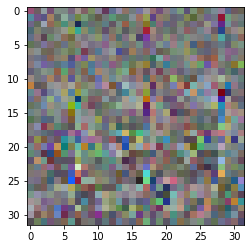

In [73]:
show_image(zca[6])

# Image transformations using Pytorch libraries

In [74]:
import torch
import torchvision
import torchvision.transforms as transforms

In [75]:
# The transforms.compose object allows you to specify a series 
# of transformations in a list or a squence

# Resize to 256 x 256 image
# Then, convert to Pytorch Tensor

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor()
])

In [78]:
# When working with images in Pytorch, you load them into a datasets

dataset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train', download=True, transform=transform)


Extracting ./datasets/cifar10/train/cifar-10-python.tar.gz to ./datasets/cifar10/train


In [80]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./datasets/cifar10/train
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear)
               ToTensor()
           )

In [81]:
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=16,
    shuffle=True,
    num_workers=2
)

# Using dataloader to load dataset
# Each batch of size 16, contain 16 images

In [82]:
dataloader

In [84]:
# Load first batch 

images_batch, labels_batch = iter(dataloader).next()


In [85]:
images_batch.shape

# 16 images in the first batch with 3 channels, 256px height and 256px width

torch.Size([16, 3, 256, 256])

In [88]:
labels_batch.shape

# 16 images with corresponding 16 labels

torch.Size([16])

In [90]:
labels_batch

tensor([2, 4, 5, 0, 7, 0, 5, 9, 3, 2, 3, 4, 5, 4, 1, 2])

In [91]:
img_gallery = torchvision.utils.make_grid(images_batch)

In [92]:
img_gallery.shape

torch.Size([3, 518, 2066])

In [93]:
img_gallery = np.transpose(img_gallery, (1, 2, 0))

In [94]:
img_gallery.shape

torch.Size([518, 2066, 3])

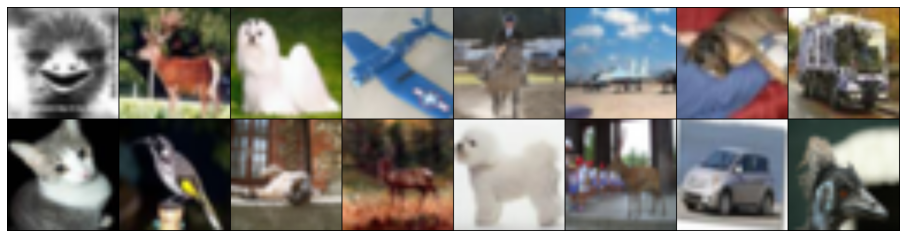

In [95]:
plt.figure(figsize=(16, 12))

plt.imshow(img_gallery)
plt.axis('off')
plt.show()

# Normalizing images using Mean and Standard Deviation

In [96]:
pop_mean = [] # List of mean values for each batch
pop_std = [] # list of standard deviation for each batch

In [105]:
for i, data in enumerate(dataloader, 0):
    
    # data[batch_images, batch_labels]
    # extract image as index of 0 and convert to numpy array
    numpy_image = data[0].numpy()
    
    # batch: (16, 3, 256, 256)
    # 16 images in every batch
    # multi-channel with 256px height and 256px width
    batch_mean = np.mean(numpy_image, axis=(0, 2, 3))
    batch_std = np.std(numpy_image, axis=(0, 2, 3))
    
    pop_mean.append(batch_mean)
    pop_std.append(batch_std)
    
    # print(numpy_image.shape)    
    # break
    

In [107]:
len(pop_mean)

3125

In [108]:
pop_mean = np.array(pop_mean)
pop_std = np.array(pop_std)

In [109]:
pop_mean.shape

# There are 3125 batches
# Mean and standard deviation for each the the three channels 

(3125, 3)

In [110]:
pop_mean = np.mean(pop_mean, axis=0)
pop_std = np.mean(pop_std, axis=0)

In [111]:
print(pop_mean)
print(pop_std)

[0.49159095 0.48234567 0.4467194 ]
[0.23834856 0.23494388 0.25271425]


In [112]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(pop_mean, pop_std)
])

In [115]:
trainset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train', 
                                        train=True, download=True, transform=transform)

Files already downloaded and verified


In [116]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True, num_workers=2)

In [117]:
images_batch, labels_batch = iter(trainloader).next()

In [119]:
images_batch.shape

torch.Size([16, 3, 224, 224])

In [120]:
img_gallery = torchvision.utils.make_grid(images_batch)
img_gallery.shape

torch.Size([3, 454, 1810])

In [121]:
img_gallery = np.transpose(img_gallery, (1, 2, 0))
img_gallery.shape

torch.Size([454, 1810, 3])

In [122]:
m, M = img_gallery.min(), img_gallery.max()

m, M

(tensor(-2.0625), tensor(2.2033))

Scale the normalized image to range 0, 1

In [123]:
img_gallery = (1 / (abs(m) * M) * img_gallery + 0.5)

In [125]:
img_gallery

tensor([[[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.0787, 0.1143, 0.1827],
         ...,
         [0.4227, 0.4155, 0.4627],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        ...,

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.3177, 0.3384, 0.3364],
         ...,
         [0.9440, 0.9591, 0.9647],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.

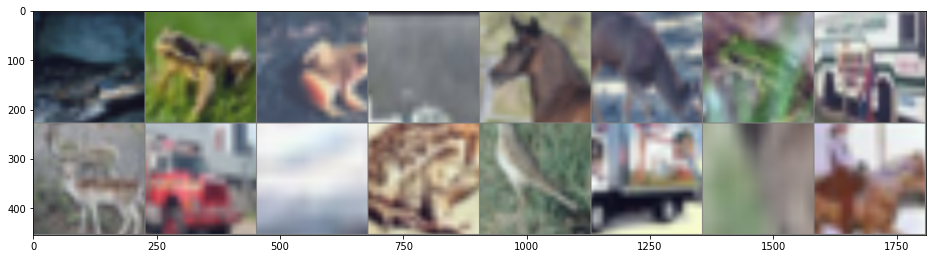

In [126]:
plt.figure(figsize=(16, 12))
plt.imshow(img_gallery)
plt.show()